In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [3]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss,grangercausalitytests

In [4]:
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
df=pd.read_csv('us_data.csv',sep='\t')
df

,Quarter,Consumption,Income,Production,Savings,Unemployment
1,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
2,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
3,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
4,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
5,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...,...,...
194,2018 Q2,0.983112,0.661825,1.117424,-2.723974,0.0
195,2018 Q3,0.853181,0.806271,1.256722,-0.085686,-0.3
196,2018 Q4,0.356512,0.695142,0.948148,5.031337,0.2
197,2019 Q1,0.282885,1.100753,-0.488206,9.760287,-0.1


In [6]:
df['date']=pd.to_datetime(df['Quarter'].str.replace(' ',''))
df.set_index('date',inplace=True)
df.index.freq='QS-JAN'
df.drop('Quarter',axis=1,inplace=True)
df

,Consumption,Income,Production,Savings,Unemployment
date,,,,,
1970-01-01,0.618566,1.044801,-2.452486,5.299014,0.9
1970-04-01,0.451984,1.225647,-0.551459,7.789894,0.5
1970-07-01,0.872872,1.585154,-0.358652,7.403984,0.5
1970-10-01,-0.271848,-0.239545,-2.185691,1.169898,0.7
1971-01-01,1.901345,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...,...
2018-04-01,0.983112,0.661825,1.117424,-2.723974,0.0
2018-07-01,0.853181,0.806271,1.256722,-0.085686,-0.3
2018-10-01,0.356512,0.695142,0.948148,5.031337,0.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 1970-01-01 to 2019-04-01
Freq: QS-JAN
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Consumption   198 non-null    float64
 1   Income        198 non-null    float64
 2   Production    198 non-null    float64
 3   Savings       198 non-null    float64
 4   Unemployment  198 non-null    float64
dtypes: float64(5)
memory usage: 9.3 KB


<AxesSubplot:xlabel='date'>

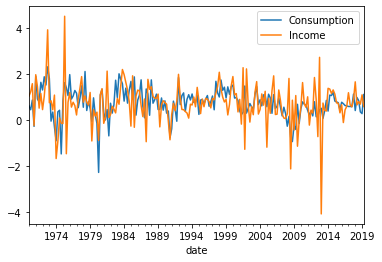

In [8]:
df[['Consumption','Income']].plot(legend=True)

In [9]:
adfuller(df['Consumption'])

(-4.6101231449022055,
 0.00012373240927130436,
 2,
 195,
 {'1%': -3.464337030867007,
  '5%': -2.876478799035722,
  '10%': -2.574733103221565},
 306.84324181648583)

In [10]:
adfuller(df['Income'])

(-6.7656134181274,
 2.722059468837914e-09,
 4,
 193,
 {'1%': -3.4646940755442612,
  '5%': -2.8766348847254934,
  '10%': -2.5748163958763994},
 469.11064516885546)

In [12]:
grangercausalitytests(df[['Consumption','Income']],maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8225  , p=0.0293  , df_denom=194, df_num=1
ssr based chi2 test:   chi2=4.8970  , p=0.0269  , df=1
likelihood ratio test: chi2=4.8372  , p=0.0279  , df=1
parameter F test:         F=4.8225  , p=0.0293  , df_denom=194, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6841  , p=0.1884  , df_denom=191, df_num=2
ssr based chi2 test:   chi2=3.4563  , p=0.1776  , df=2
likelihood ratio test: chi2=3.4262  , p=0.1803  , df=2
parameter F test:         F=1.6841  , p=0.1884  , df_denom=191, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3557  , p=0.2578  , df_denom=188, df_num=3
ssr based chi2 test:   chi2=4.2186  , p=0.2388  , df=3
likelihood ratio test: chi2=4.1736  , p=0.2433  , df=3
parameter F test:         F=1.3557  , p=0.2578  , df_denom=188, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6619  , p=0.1607  

{1: ({'ssr_ftest': (4.822459130803696, 0.029276853643505723, 194.0, 1),
   'ssr_chi2test': (4.897033241073856, 0.026902876229972755, 1),
   'lrtest': (4.837158147802484, 0.0278527586745701, 1),
   'params_ftest': (4.822459130803681, 0.029276853643505945, 194.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.6840657336352534, 0.18836203572157817, 191.0, 2),
   'ssr_chi2test': (3.4563024480891067, 0.17761247228772578, 2),
   'lrtest': (3.426181480907303, 0.18030764638208824, 2),
   'params_ftest': (1.6840657336352338, 0.18836203572157892, 191.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.3557106457032684, 0.2577711331691011, 188.0, 3),
   'ssr_chi2test': (4.218567700725596, 0.23880946864445363, 3),
   'lrtest': (4.173583750414082, 0.24331999598530307, 3),
   'params_ftest': (1.3557106457032813, 0.2577711331690909, 188.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [13]:
grangercausalitytests(df[['Income','Consumption']],maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.7569 , p=0.0000  , df_denom=194, df_num=1
ssr based chi2 test:   chi2=23.1088 , p=0.0000  , df=1
likelihood ratio test: chi2=21.8509 , p=0.0000  , df=1
parameter F test:         F=22.7569 , p=0.0000  , df_denom=194, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.6515  , p=0.0001  , df_denom=191, df_num=2
ssr based chi2 test:   chi2=19.8083 , p=0.0000  , df=2
likelihood ratio test: chi2=18.8701 , p=0.0001  , df=2
parameter F test:         F=9.6515  , p=0.0001  , df_denom=191, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.8899  , p=0.0000  , df_denom=188, df_num=3
ssr based chi2 test:   chi2=30.7745 , p=0.0000  , df=3
likelihood ratio test: chi2=28.5747 , p=0.0000  , df=3
parameter F test:         F=9.8899  , p=0.0000  , df_denom=188, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.9666  , p=0.0000  

{1: ({'ssr_ftest': (22.756900160084378, 3.606706940851373e-06, 194.0, 1),
   'ssr_chi2test': (23.108810987302178, 1.5308757911111413e-06, 1),
   'lrtest': (21.850903275624944, 2.946778497402558e-06, 1),
   'params_ftest': (22.756900160084353, 3.6067069408514184e-06, 194.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (9.6514885484608, 0.00010161291146155666, 191.0, 2),
   'ssr_chi2test': (19.80829063349023, 4.9967122603523374e-05, 2),
   'lrtest': (18.870058954110846, 7.98764511990486e-05, 2),
   'params_ftest': (9.651488548460769, 0.00010161291146156023, 191.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (9.889918695760983, 4.361586242578561e-06, 188.0, 3),
   'ssr_chi2test': (30.774481047979656, 9.482496572962478e-07, 3),
   'lrtest': (28.574728851674877, 2.7509226577650864e-06, 3),
   'params_ftest': (9.889918695760993, 4.361586242578506e-06, 188.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.

In [31]:
stepwise_fit=auto_arima(df['Production'],seasonal=False,d=0,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=655.018, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=750.017, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=653.529, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=667.267, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=654.123, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=653.232, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=653.562, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=653.448, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=659.042, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=649.179, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=657.083, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=650.970, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=650.095, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=650.303, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=731.0

In [15]:
model=SARIMAX(df['Consumption'],order=(3,0,0),seasonal_order=(0,0,0,0))
results=model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02161D-01    |proj g|=  1.80612D-02

At iterate    5    f=  9.02121D-01    |proj g|=  9.08667D-04

At iterate   10    f=  9.02114D-01    |proj g|=  4.07846D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   4.078D-06   9.021D-01
  F =  0.90211402899708149     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  198
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -178.619
Date:                Wed, 20 Apr 2022   AIC                            365.237
Time:                        09:57:07   BIC                            378.390
Sample:                    01-01-1970   HQIC                           370.561
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3011      0.048      6.323      0.000       0.208       0.394
ar.L2          0.2558      0.051      5.057      0.000       0.157       0.355
ar.L3          0.3229      0.056      5.729      0.000       0.212       0.433
sigma2         0.3533      0.025     13.938      0.000       0.304       0.403
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                50.94
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
train=df.iloc[:-4]
test=df.iloc[-4:]

In [17]:
model=SARIMAX(train['Consumption'],order=(3,0,0),seasonal_order=(0,0,0,0))
results=model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.07706D-01    |proj g|=  1.84414D-02

At iterate    5    f=  9.07663D-01    |proj g|=  9.62669D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   5.100D-06   9.077D-01
  F =  0.90765521326478893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  194
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -176.085
Date:                Wed, 20 Apr 2022   AIC                            360.170
Time:                        09:59:12   BIC                            373.242
Sample:                    01-01-1970   HQIC                           365.463
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3016      0.048      6.264      0.000       0.207       0.396
ar.L2          0.2604      0.051      5.092      0.000       0.160       0.361
ar.L3          0.3181      0.057      5.552      0.000       0.206       0.430
sigma2         0.3572      0.026     13.759      0.000       0.306       0.408
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                49.65
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start=len(train)
end=start+len(test)-1

In [19]:
predictions=results.predict(start=start,end=end,dynamic=False).rename('SARIMA')

<AxesSubplot:xlabel='date'>

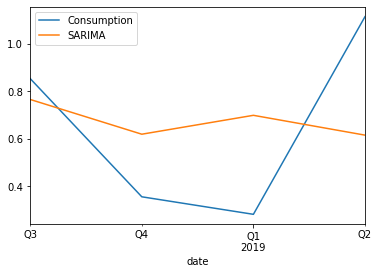

In [22]:
ax=test['Consumption'].plot(legend=True)
predictions.plot(legend=True)

In [23]:
mean_absolute_percentage_error(test['Consumption'],predictions)

0.6895530789585476

In [26]:
modelExog=SARIMAX(train['Consumption'],exog=train['Income'],order=(3,0,0),seasonal_order=(0,0,0,0))
resultsExog=modelExog.fit()
resultsExog.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00359D+00    |proj g|=  5.34631D-01

At iterate    5    f=  8.73435D-01    |proj g|=  5.91703D-02

At iterate   10    f=  8.70844D-01    |proj g|=  1.62651D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   1.599D-06   8.708D-01
  F =  0.87084105263751344     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  194
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -168.943
Date:                Wed, 20 Apr 2022   AIC                            347.886
Time:                        10:09:44   BIC                            364.226
Sample:                    01-01-1970   HQIC                           354.503
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Income         0.1782      0.032      5.558      0.000       0.115       0.241
ar.L1          0.2171      0.054      4.003      0.000       0.111       0.323
ar.L2          0.3444      0.057      6.065      0.000       0.233       0.456
ar.L3          0.2838      0.057      4.951      0.000       0.171       0.396
sigma2         0.3321      0.025     13.041      0.000       0.282       0.382
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                36.40
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
predictionsExog=resultsExog.predict(start=start,end=end,exog=test['Income'],dynamic=False).rename('SARIMAX')

<AxesSubplot:xlabel='date'>

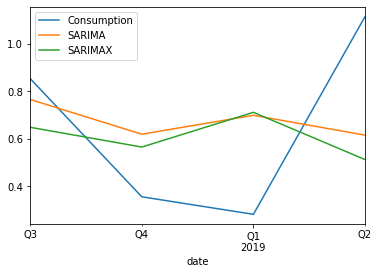

In [28]:
ax=test['Consumption'].plot(legend=True)
predictions.plot(legend=True)
predictionsExog.plot(legend=True)

In [29]:
mean_absolute_percentage_error(test['Consumption'],predictionsExog)

0.7201050748679051

In [32]:
from statsmodels.tsa.api  import VAR 

In [33]:
df1=df[['Consumption','Income']]
df1

,Consumption,Income
date,,
1970-01-01,0.618566,1.044801
1970-04-01,0.451984,1.225647
1970-07-01,0.872872,1.585154
1970-10-01,-0.271848,-0.239545
1971-01-01,1.901345,1.975925
...,...,...
2018-04-01,0.983112,0.661825
2018-07-01,0.853181,0.806271
2018-10-01,0.356512,0.695142


In [34]:
trainVAR=df1.iloc[:-4]
testVAR=df1.iloc[-4:]

In [37]:
for i in range(1,10):
    modelVAR=VAR(trainVAR)
    resultsVAR=modelVAR.fit(i)
    print('order= ',i)
    print('AIC= ', resultsVAR.aic)
    print('')

order=  1
AIC=  -1.44355774811431

order=  2
AIC=  -1.4427021710347265

order=  3
AIC=  -1.47905868013255

order=  4
AIC=  -1.4929139211167433

order=  5
AIC=  -1.555900188730903

order=  6
AIC=  -1.5281062869097655

order=  7
AIC=  -1.5045248025067974

order=  8
AIC=  -1.4866123239137767

order=  9
AIC=  -1.438980776981068



In [38]:
modelVAR=VAR(trainVAR)
resultsVAR=modelVAR.fit(5)

In [39]:
resultsVAR.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Apr, 2022
Time:                     10:30:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.17855
Nobs:                     189.000    HQIC:                  -1.40303
Log likelihood:          -367.326    FPE:                   0.211055
AIC:                     -1.55590    Det(Omega_mle):        0.188477
--------------------------------------------------------------------
Results for equation Consumption
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.349013         0.087649            3.982           0.000
L1.Consumption         0.189323         0.077975            2.428           0.015
L1.Income              0.108857         0.054103  

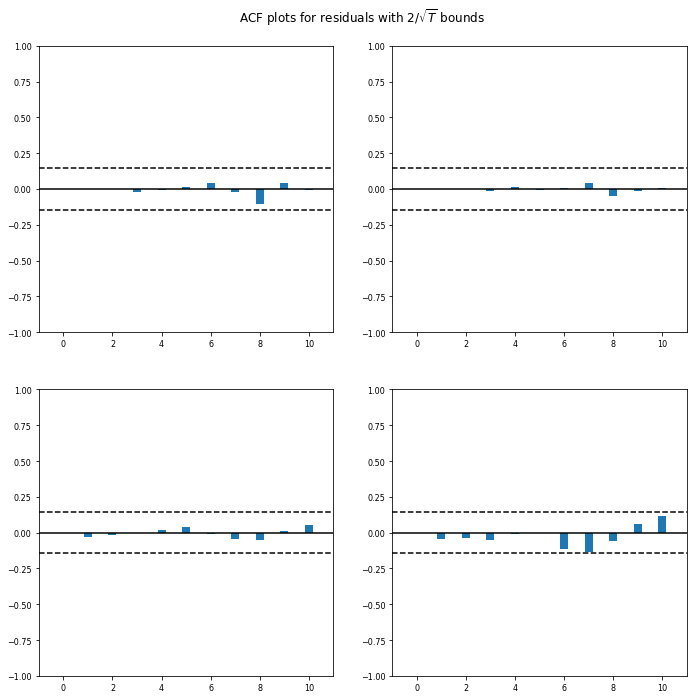

In [40]:
resultsVAR.plot_acorr();

In [42]:
lag_order=resultsVAR.k_ar
lag_order

5

In [44]:
predictedValues=resultsVAR.forecast(df1.values[-lag_order:],4)
predictedValues



array([[0.58313943, 0.65003969],
       [0.62821021, 0.31107678],
       [0.76946343, 0.80071605],
       [0.69544088, 0.75463026]])

In [45]:
testValuesConsumption=testVAR['Consumption'].values
testValuesConsumption

array([0.85318135, 0.35651203, 0.28288547, 1.1135167 ])

In [46]:
testValuesIncome=testVAR['Income'].values
testValuesIncome

array([0.80627128, 0.69514222, 1.10075295, 0.5933995 ])

In [47]:
mean_absolute_percentage_error(testValuesConsumption,predictedValues[:,0])

0.7935302535890587

In [48]:
mean_absolute_percentage_error(testValuesIncome,predictedValues[:,1])

0.32263769174292994

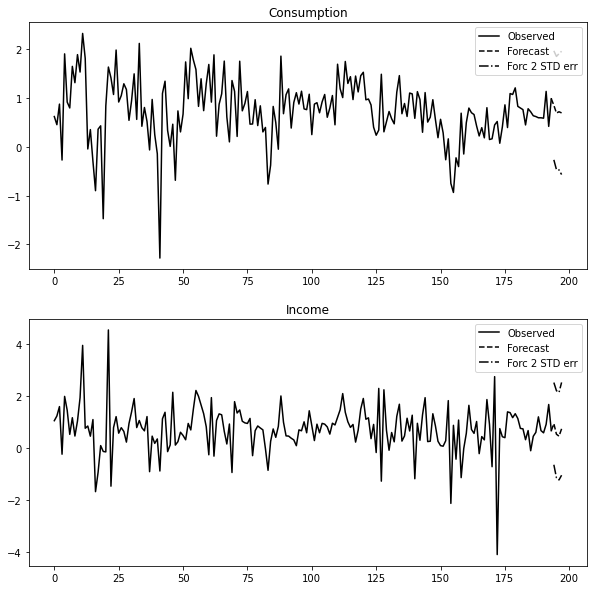

In [50]:
resultsVAR.plot_forecast(4);